In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Conv1D, AveragePooling1D, Concatenate
from tensorflow.keras.models import Model
from tensorflow import keras

In [2]:
from tensorflow.keras.models import Sequential

seq_model = Sequential([
    Conv1D(16, 5, activation='relu', input_shape=(32, 1)),
    AveragePooling1D(3),
    Flatten(),
    Dense(20, activation='sigmoid')
])

In [3]:
seq_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 28, 16)            96        
_________________________________________________________________
average_pooling1d (AveragePo (None, 9, 16)             0         
_________________________________________________________________
flatten (Flatten)            (None, 144)               0         
_________________________________________________________________
dense (Dense)                (None, 20)                2900      
Total params: 2,996
Trainable params: 2,996
Non-trainable params: 0
_________________________________________________________________


# Building this same Sequential Model with Functional API

* The `Model` class which we use is the same class which Sequential inherits from.
* This allows us to build models with different topologies, models with multiple outputs and inputs and much more.

In [4]:
# Explicit layer to specify the inputs
inputs = Input(shape=(32, 1))  # We provide this layer with the shape of a single data example
h = Conv1D(16, 5, activation='relu')(inputs)  # We use the layer object `Conv1D` as a function that calls on the inputs
h = AveragePooling1D(3)(h)
h = Flatten()(h)
outputs = Dense(20, activation='sigmoid')(h)

# We have now defined the flow of our model.
functional_api_model = Model(inputs=inputs, outputs=outputs)
# Model training is the same as training a Sequential Model
# We will be having much more flexibility in training
# which we will see shortly

In [5]:
functional_api_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 1)]           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 16)            96        
_________________________________________________________________
average_pooling1d_1 (Average (None, 9, 16)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 144)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                2900      
Total params: 2,996
Trainable params: 2,996
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Deleting the models(so that we can use these names later on in the notebook)
del functional_api_model
del seq_model
del inputs
del outputs
del h

# Models with multiple inputs and outputs

In [7]:
inputs = Input(shape=(32, 1), name='inputs')
h = Conv1D(16, 5, activation='relu')(inputs)
h = AveragePooling1D(3)(h)
h = Flatten()(h)
aux_inputs = Input(shape=(12, ), name='aux_inputs')
h = Concatenate()([h, aux_inputs])  # h.shape = (None, 156) => 144 + 12(aux_inputs)
outputs = Dense(20, activation='sigmoid', name='outputs')(h)
aux_outputs = Dense(1, activation='linear', name='aux_outputs')(h)

model = Model(inputs=[inputs, aux_inputs], outputs=[outputs, aux_outputs])

# Compiling and Fitting the model.

In [8]:
# model.compile(loss=['binary_crossentropy', 'mse'], loss_weights=[1, 0.4], metrics=['accuracy'])
# history = model.fit([X_train, X_aux], [y_train, y_aux], validation_split=0.2, epochs=20)

# # Pass a list of loss functions which are of the same order as the outputs we have created.
# # We need to combine the losses into a single loss to do gradient descent
# # that is the final loss = 1*binary_crossentropy + 0.4*mse

# # Another way to compile and train the model is
# # But to use this style of compiling and fitting, 
# # It is mandatory to name our input and output layers
# model.compile(
#     loss={'outputs': 'binary_crossentropy', 'aux_inputs': 'mse'},
#     loss_weights={'outputs': 1, 'aux_outputs': 0.4}, metrics=['accuracy']
# )
# history = model.fit(
#     {'inputs': X_train, 'aux_inputs': X_aux},
#     {'outputs': y_train, 'aux_outputs': y_aux},
#     validation_split=0.2, epochs=20
# )

# # This way of compiling and training is much verbose and easier to understand

# The UCI acute inflammation dataset

* This dataset contains multiple outpts.
#### Load the acute inflammations dataset

The `acute inflammations` was created by a medical expert as a data set to test the expert system, which will perform the presumptive diagnosis of two diseases of the urinary system. You can find out more about the dataset [here](https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations).

Attribute information:

Inputs:
- Temperature of patient : 35C-42C
- Occurrence of nausea : yes/no
- Lumbar pain : yes/no
- Urine pushing (continuous need for urination) : yes/no
- Micturition pains : yes/no
- Burning of urethra, itch, swelling of urethra outlet : yes/no

Outputs:
- Decision 1: Inflammation of urinary bladder : yes/no - 1/0
- Decision 2: Nephritis of renal pelvis origin : yes/no - 1/0

In [9]:
# Load the dataset

from sklearn.model_selection import train_test_split

pd_df = pd.read_csv('diagnosis.csv')
dataset = pd_df.values

In [10]:
pd_df.columns = [
    'Temperature', 'Nausea-Occurrence', 'Lumbar Pain', 'Urine Pushing', 'Micturition pains', 'Urethra Burning',
    'Decision1-UrinaryBladderInflammation',
    'Decision2-NephritisRenalPelvis'
]
pd_df.head()

,Temperature,Nausea-Occurrence,Lumbar Pain,Urine Pushing,Micturition pains,Urethra Burning,Decision1-UrinaryBladderInflammation,Decision2-NephritisRenalPelvis
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,:6], dataset[:,6:], test_size=0.33)

In [12]:
temp_train, nocc_train, lumbp_train, up_train, mict_train, bis_train = np.transpose(X_train)
temp_test, nocc_test, lumbp_test, up_test, mict_test, bis_test = np.transpose(X_test)

inflam_train, nephr_train = Y_train[:, 0], Y_train[:, 1]
inflam_test, nephr_test = Y_test[:, 0], Y_test[:, 1]

In [13]:
shape_inputs = (1, )
temperature = Input(shape=shape_inputs, name='temp')
nausea_occurence = Input(shape=shape_inputs, name='nocc')
lumbar_pain = Input(shape=shape_inputs, name='lumbp')
urine_pushing = Input(shape=shape_inputs, name='up')
micturition_pains = Input(shape=shape_inputs, name='mict')
bis = Input(shape=shape_inputs, name='bis')

In [14]:
list_inputs = [temperature, nausea_occurence, lumbar_pain, urine_pushing, 
               micturition_pains, bis]

In [15]:
x = keras.layers.concatenate(list_inputs)

In [16]:
# Use a logistic regression classifier for disease prediction
inflammation_pred = Dense(1, activation='sigmoid', name='inflam')(x)
nephritis_pred = Dense(1, activation='sigmoid', name='nephr')(x)

In [17]:
list_outputs = [inflammation_pred, nephritis_pred]

In [18]:
# Create the model object

model = tf.keras.Model(inputs=list_inputs, outputs=list_outputs)

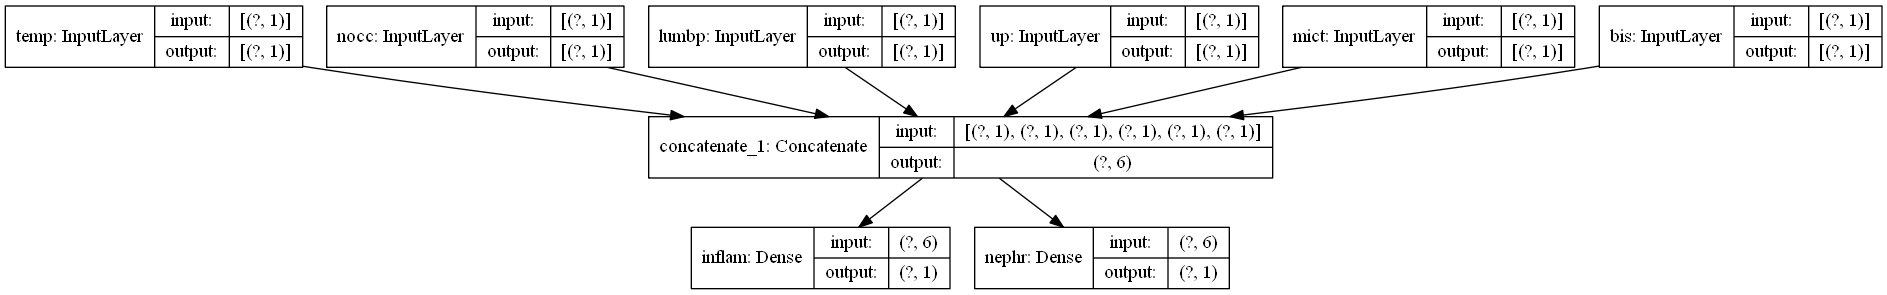

In [19]:
# Display the multiple input/output model

tf.keras.utils.plot_model(model, 'mulit_input_output_model.png', show_shapes=True)